In [1]:
#IMPORTING NECESSARY LIBRARIES
#THIS LIBRARY DOES THE MOST WORK AS ITS THE MOST USED THROUGHOUT THE WHOLE PROJECT...
import pandas as pd 
import numpy as np
#FOR VISUALIZING OUR DATA
import matplotlib.pyplot as plt

In [2]:
#READING THE FILE IN CSV FORMAT
sales_data = pd.read_csv('sales_data.csv')

In [3]:
#CREATING A NEW COLUMN MONTHS ON THE DATA 
sales_data['Months'] = sales_data['Order Date'].str[0:2]
sales_data = sales_data.dropna(how='any')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [4]:
#CLEANING THE DATA OFF UNNECESSARY NaN VALUES THAT MIGHT BE HINDERING OUR DATA ANALYSIS..
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']

In [5]:
# CHANGING OUR NEWLY CREATED COLUMN INTO THE INTEGER TYPE FORMAT [CAN NOT WORK NUMERICAL STATS WITH STRING VALUES]
sales_data['Months'] = sales_data['Months'].astype('int32')
#SHOWING OUR NEW DATA TO VERIFY OUR CODE...
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [6]:
# CHANGING NECESSARY COLUMNS (QUANTITY ORDERED,PRICE EACH) TO NUMERIC FORMAT FOR OUR CALCULATIONS 
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [7]:
#CREATING A NEW COLUMN TOTAL AMOUNT WHICH IS THE PRODUCT OF THE (Quantity Ordered) AND THE (Price Each) COLUMNS RESPECTIVELY..
sales_data['Total Amount'] = sales_data['Quantity Ordered']*sales_data['Price Each']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## THE MONTH WITH THE HIGHEST SALES

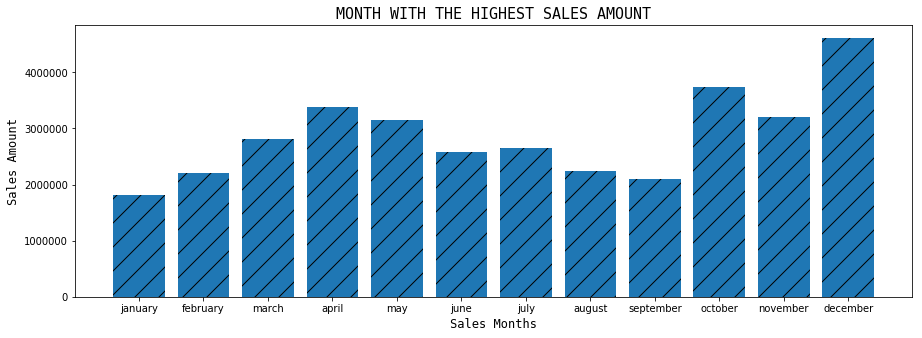

In [8]:
'''
PLOTTING OUR GRAPH OF THE MONTH WITH THE HIGHEST SALES AMOUNT....
         FROM THE CHART BELOW ITS OBVIOUS THAT DECEMBER IS THE MONTH WITH THE HIGHEST SALES .....
         THIS MIGHT BE DUE TO THE HEAVY DEMANDS FROM THE PEOPLE AS ITS CHRISTMAS PERIOD...
'''


sales = sales_data.groupby('Months')['Total Amount'].sum()
import matplotlib.pyplot as plt
months = ['january','february','march','april','may','june','july','august','september','october','november','december']
axs,fig = plt.subplots(figsize=(15,5))
plt.bar([x for x in range(1,13)],sales,hatch='/')
plt.title('MONTH WITH THE HIGHEST SALES AMOUNT',fontdict={'fontname':'Monospace','fontsize':'15'})
plt.xlabel('Sales Months',fontdict={'fontname':'Monospace','fontsize':'12'})
plt.ylabel('Sales Amount',fontdict={'fontname':'Monospace','fontsize':'12'})
plt.xticks([i for i in range(1,13)],months)
plt.show()

## THE CITY WITH THE HIGHEST SALES

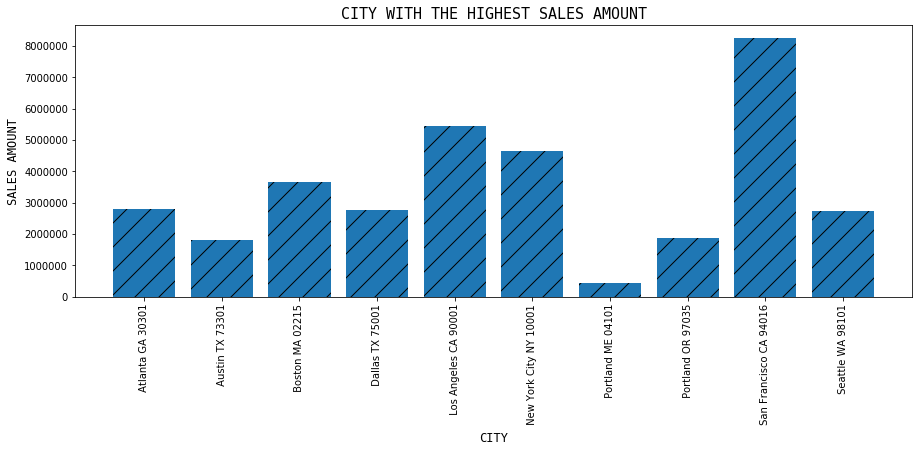

In [9]:
'''
THE SECOND BAR CHART SHOWS THE CITY WITH THE HIGHEST SALES AMOUNT ..
        THIS CHART SHOWS THAT SAN FRANSISCO CA IS THE CITY WITH THE HIGHEST SALES
                    [RICH CITY [;-)] ...]
'''

sales_data['City'] = sales_data['Purchase Address'].str.split(',').str.get(1) + sales_data['Purchase Address'].str.split(',').str.get(2) 
sales = sales_data.groupby('City')['Total Amount'].sum()
city = [city for city , df in sales_data.groupby('City')]
axs,fig = plt.subplots(figsize=(15,5))
plt.bar([x for x in range(1,11)],sales,hatch='/')
plt.title('CITY WITH THE HIGHEST SALES AMOUNT',fontdict={'fontname':'Monospace','fontsize':'15'})
plt.xlabel('CITY',fontdict={'fontname':'Monospace','fontsize':'12'})
plt.ylabel('SALES AMOUNT',fontdict={'fontname':'Monospace','fontsize':'12'})
plt.xticks([i for i in range(1,11)],city,rotation = 90)
plt.show()

## SUGGESTED TIME FOR APPROPRIATE ADVERTISEMENT OF PRODUCTS

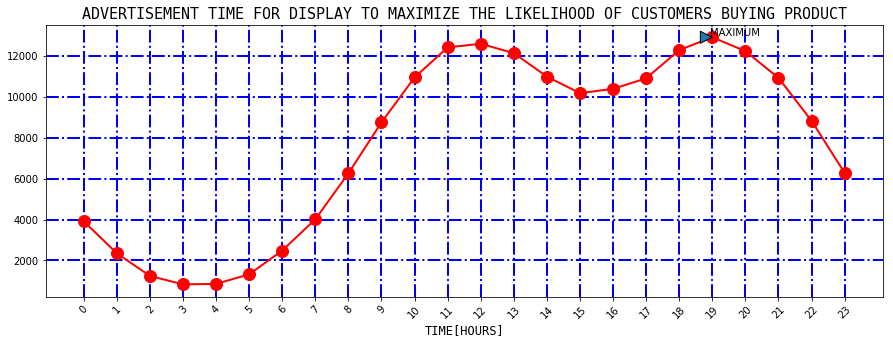

In [10]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Hour'] = sales_data['Order Date'].dt.hour
sales_data['Minutes'] = sales_data['Order Date'].dt.minute
hour = sales_data.groupby('Hour')['Hour'].count()
axs,fig = plt.subplots(figsize=(15,5))
plt.plot([x for x in range(24)],hour,linewidth=2,marker = 'o',color = 'red',markersize = 12)
plt.title('ADVERTISEMENT TIME FOR DISPLAY TO MAXIMIZE THE LIKELIHOOD OF CUSTOMERS BUYING PRODUCT',fontdict={'fontname':'Monospace','fontsize':'15'})
plt.xlabel('TIME[HOURS]',fontdict={'fontname':'Monospace','fontsize':'12'})
plt.xticks([i for i in range(24)],rotation = 45)
plt.grid(color='b',linestyle='-.',linewidth=2)
plt.annotate('MAXIMUM',xy=[19,12905],xytext=(-2,2),arrowprops={'width':2,'shrink':4.5},textcoords='offset points')
plt.show()

## THE MOST ORDERED PAIR OF PRODUCTS

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


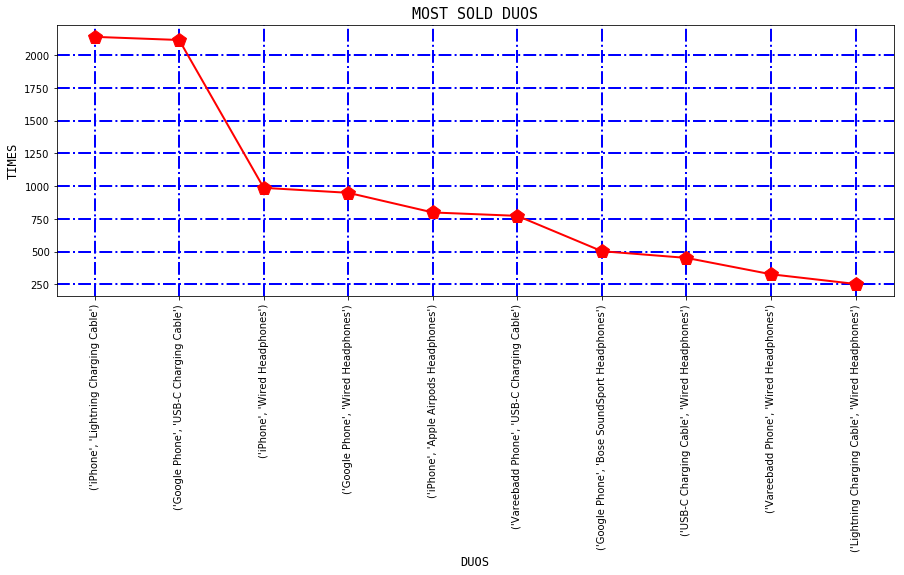

In [11]:
'''
    THE CHART BELOW SHOWS THE MOST ORDERED DUO PRODUCTS ....
        NB; THIS GRAPH MAY ALSO BE PLOTTED FOR THE MOST ORDERED THREE OR FOUR PRODUCTS AS THE NEED MIGHT BE ....
        
THE COUNTER LIBRARY RETURNS THE PRODUCTS IN TUPLE FORMAT AND THE NUMBER OF TIMES THEY WERE ORDERED---
---ALONGSIDE IT IN A DICTIONARY-LIKE FORMAT..
THE COMBINATIONS METHOD ALLOWS US TO SPECIFY THE NUMBER OF COMBO OF PRODUCTS WE DESIRED TO KNOW...MIGHT--
--HAVE BEEN 3 OR 4 ...ETC

'''


from collections import Counter
from itertools import combinations

df = sales_data[sales_data['Order ID'].duplicated(keep=False)]
df['duplicate'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df = df[['Order ID','duplicate']]
df.drop_duplicates(keep='first')
#INITIALIZING THE COUNT...
count = Counter()
for object in df['duplicate']:
    #SPLITTING THE OBJECT IN THE DUPLICATE COLUMN WITH THE .SPLIT METHOD
    object_value = object.split(',')
    #UPDATING OUR COUNT WITH THE SPECIFIED NUMBER OF COMBOS
    count.update(Counter(combinations(object_value,2)))
count.most_common(10)
# PLOTTING THE GRAPH....
'''
SINCE OUR RESULTS IS IN A 'LIST OF DICTIONARY' FORMAT....IT IS NECESSARY TO BREAK IT DOWN TO THE LIST FORMAT FOR THE LIBRARY--
--TO WORK WITH...
LIST INDEX1 TO HOLD THE KEYS WHICH IS THE TUPLE OF THE PRODUCT COMBOS...
LISTINDEX2 TO HOLD THE VALUE WHICH IS THE NUMBER OF TIMES THE COMBOS WERE ORDERED TOGETHER...

'''
listIndex1 = []
listIndex2 = []
# USING FOR LOOP TO LOOP THROUGH OUR LIST OF DICTIONARY
for keys , values in count.most_common(10):
    listIndex1.append(str(keys))
    listIndex2.append(values)

listIndex1
###PLOTTING THE GRAPH OF LISTINDEX1 ON THE X-AXIS AGAINST THE LIST INDEX2 ON THE Y-AXIS...
plt.subplots(figsize = (15,5))
plt.plot(listIndex1,listIndex2,marker = 'p',linewidth=2,markersize=14,color='red')
plt.title('MOST SOLD DUOS',fontdict={'fontname':'Monospace','fontsize':'15'})
plt.xlabel('DUOS',fontdict={'fontname':'Monospace','fontsize':'12'})
plt.ylabel('TIMES',fontdict={'fontname':'Monospace','fontsize':'12'})
plt.xticks(listIndex1,rotation = 90)
plt.grid(color='b',linestyle='-.',linewidth=2)
plt.show()

## THE MOST SOLD PRODUCT AND THE REASON WHY IT IS THE MOST SOLD...

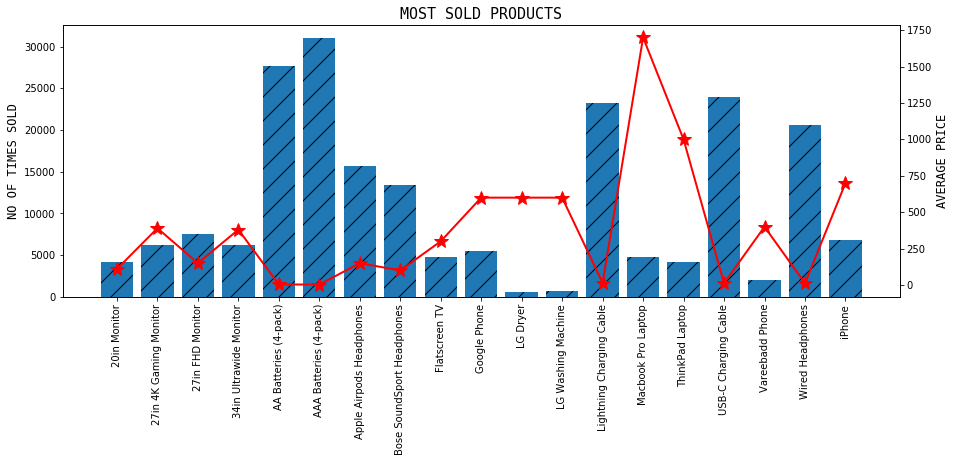

In [12]:
#MOST SOLD PRODUCT .... THIS IS GOTTEN BY SUMMING OUR DATA'S QUANTITY ORDERED ....
#HERE WE DIDN'T COUNT OUR PDODUCT COLUMN AS THIS WILL PRODUCE A WRONG RESULT WHICH WILL GEOPARDISE OUR VISUALIZATION..
most_sold = sales_data.groupby('Product').sum()['Quantity Ordered']
product = [product for product ,df in sales_data.groupby('Product')]
#AVERAGE PRICE OF THE PRODUCTS 
AVGprice = sales_data.groupby('Product').mean()['Price Each']
fig,axs = plt.subplots(figsize=(15,5))
## TRYING TO PLOT ON THE SECOND Y-AXIS TO V=ANSWER OUR QUESTION WHY!!!...
#SETTING  THE NEW AXIS WITH THE CODE BELOW...
# THIS CODE SHARES THE AXES BY CREATING A TWIN AXIS....
axs1 = axs.twinx()
#AXS1 REPRESENTS THE NEW AXIS....
axs1.plot(product,AVGprice,marker = '*',linewidth=2,markersize=14,color='red')
axs.bar(product,most_sold,hatch='/')
plt.title('MOST SOLD PRODUCTS',fontdict={'fontname':'Monospace','fontsize':'15'})
axs1.set_ylabel('AVERAGE PRICE',fontdict={'fontname':'Monospace','fontsize':'12'})
axs.set_ylabel('NO OF TIMES SOLD',fontdict={'fontname':'Monospace','fontsize':'12'})
axs.set_xticklabels(product,rotation = 90)
plt.show()

### ANSWERING THE ABOVE QUESTION ....
### ITS THE MOST SOLD PRODUCT MAINLY DUE TO ITS RELATIVELY LOW PRICE...

 ## THE MOST GROSSING PRODUCT OF THE WHOLE DATASET...

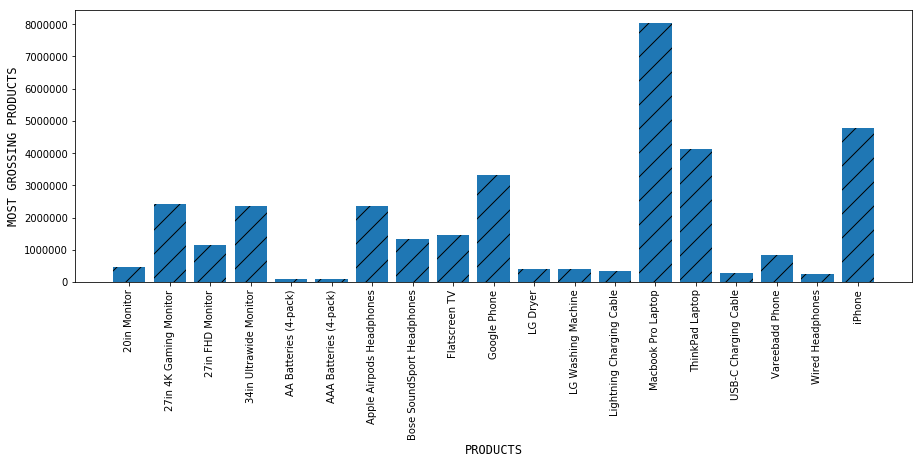

In [13]:
'''
THE GRAPH BELOW SHOWS THE MOST GROSSING PRODUCT OF THE WHOLE DATASET....

FROM THE GRAPH ITS OBVIOUS THAT THE MOST GROSSING PRODUCT IS THE McBook Pro FOLLOWED BY THE IPHONE SERIES...

***THIS IS SO BECAUSE OF THE VERY HIGH DEMANDING USE OF LAPTOP NOWADAYS AND SO--
        ---THE HIGH PRICE OF THE LAPTOP DIDNT ACTUALLY AFFECT THE SALES OF THE PRODUCTS
'''
most_grossing = sales_data.groupby('Product').sum()['Total Amount']
product = [prod for prod,df in sales_data.groupby('Product')]
plt.subplots(figsize=(15,5))
plt.bar(product,most_grossing,hatch='/')
plt.xticks(product,rotation=90)
plt.xlabel('PRODUCTS',fontdict={'fontname':'Monospace','fontsize':'12'})
plt.ylabel('MOST GROSSING PRODUCTS',fontdict={'fontname':'Monospace','fontsize':'12'})
plt.show()